
##Assignment 2.3 - Self-Organizing Map

In this file, we work on the SOM on the Iris dataset, which is a 3-class classification dataset.

SOM is implemented with a ``python`` package named ``minisom``. Detailed instructions of this package is provided [here](https://github.com/JustGlowing/minisom).


In [5]:
# Please first load your google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Please go to the folder with all assignment files
# Please change the following path to your own path
!cd /content/drive/MyDrive/DataMiningAndNeuralNetworks/session2

We need the following ``python`` package named [``minisom``](https://github.com/JustGlowing/minisom) for training SOM.

MiniSom is a minimalistic and Numpy based implementation of the Self Organizing Maps (SOM).

This means that in order to use MiniSom, your data needs to be organized as a Numpy matrix where each row corresponds to an observation or as list of lists.

In [13]:
!pip install minisom

# Training SOM on the Two Moons dataset

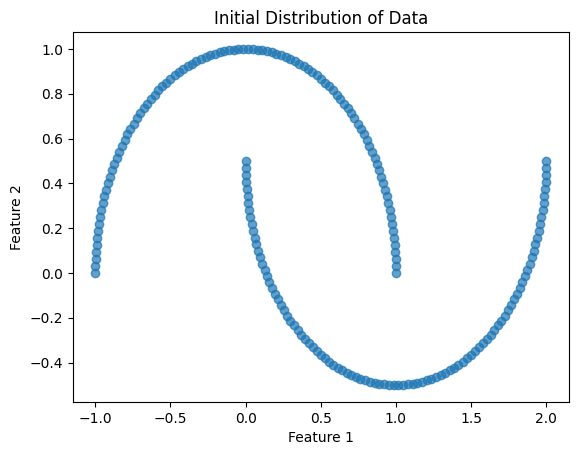

In [14]:
from minisom import MiniSom
import numpy as np
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
from collections import OrderedDict

# We generate the two moons dataset with 200 samples in total
data = sklearn.datasets.make_moons(200)[0]

plt.figure()
plt.scatter(data[:, 0], data[:, 1], alpha=0.7)
plt.title("Initial Distribution of Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


 [ 1 / 1 ] 100% - 0:00:00 left 
 quantization error: 0.4051728353758915
 [ 50 / 50 ] 100% - 0:00:00 left 
 quantization error: 0.2553074412094306
 [ 200 / 200 ] 100% - 0:00:00 left 
 quantization error: 0.1596432036985602
 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 0.10235611132520007


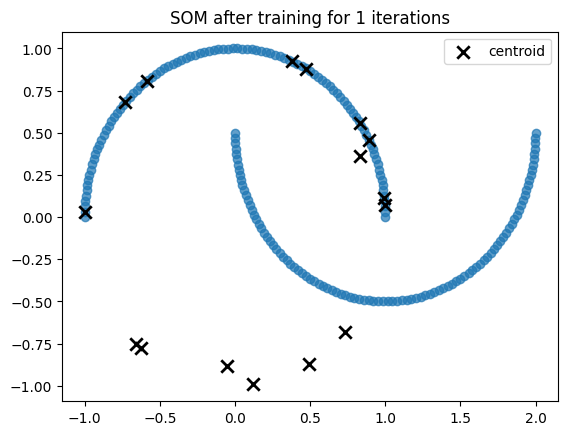

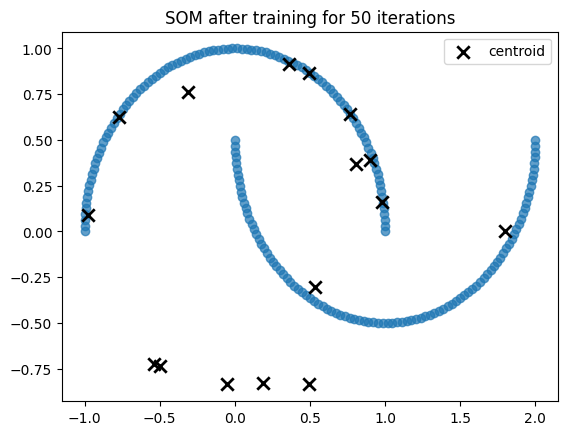

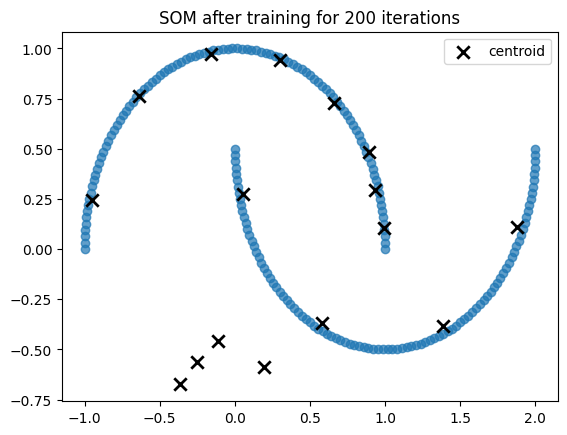

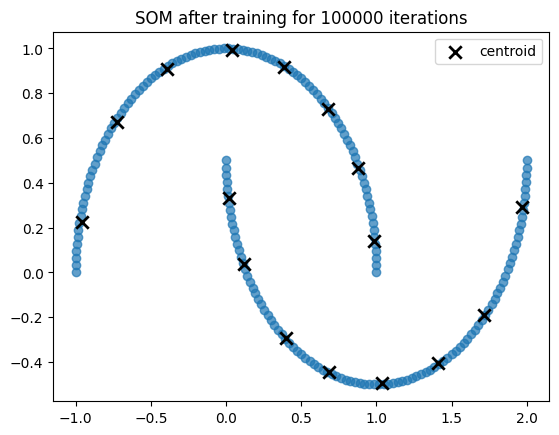

In [27]:
# Initialization and training
som_shape = (4, 4) # shape of the som, 4x4 neurons in total

training_iteration_list = [1, 50, 200, 100000]

for i in range(len(training_iteration_list)):
    train_iter = training_iteration_list[i]
    '''
    Parameters of MiniSom:
        - x, y : correspond to the dimensions of the SOM
        - input_len : number of features used in the training dataset
        - Sigma : is the radius of the different neighbors in the SOM. The default value for this is 1.0.
        - learning_rate : determines how much weights are adjusted during each iteration.
        - The training algorithm implemented decreases both parameters (sigma and learning_rate) as training progresses. This allows rapid initial training of the neural network that is then "fine tuned" as training progresses.
        - MiniSom implements two types of training: train_random and train_batch. In train_random, we train the model by picking random samples from our data. In train_batch, the samples are picked in the order that they are stored.
        - random_weights_init method initializes the weights by picking random samples from the data.
    '''
    som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)

    # plt.figure()
    # for centroid in som.get_weights():
    #     plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', s=80, linewidths=2, color='k')
    # plt.title("Centroïd distribution before training")
    # plt.show()


    som.train_batch(data, train_iter, verbose=True)

    # Each neuron represents a cluster
    winner_coordinates = np.array([som.winner(x) for x in data]).T
    # With np.ravel_multi_index we convert the bidimensional
    # coordinates to a monodimensional index
    cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

    plt.figure()
    plt.scatter(data[:,0],data[:,1], alpha=.7)
    #  plotting centroids
    for centroid in som.get_weights():
        plt.scatter(centroid[:, 0], centroid[:, 1], marker='x',
                s=80, linewidths=2, color='k', label='centroid')
    handles, labels = plt.gca().get_legend_handles_labels() # avoid repeating legends
    by_label = OrderedDict(zip(labels,handles))
    plt.legend(by_label.values(),by_label.keys())
    plt.title("SOM after training for {} iterations".format(train_iter))

# SOM on Iris dataset

In [28]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

iris = datasets.load_iris()
print('>> shape of data:',iris.data.shape)

feature_names = iris.feature_names
class_names = iris.target_names

X = iris.data
y = iris.target

# Partition dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

>> shape of data: (150, 4)


In [29]:
from minisom import MiniSom
import math

N = X_train.shape[0]  # number of samples
M = X_train.shape[1]  # feature dimensions

# Set hyper-parameters
size = math.ceil(np.sqrt(5 * np.sqrt(N)))  # empirical formula to decide size of the SOM
print("Number of samples:{}  Numer of test samples:{}".format(N,X_test.shape[0]))
print("Best side length of SOM:",size)

max_iter = 200

# Initialization and training
'''
Parameters of MiniSom:
    - x, y : correspond to the dimensions of the SOM
    - input_len : number of features used in the training dataset
    - Sigma : is the radius of the different neighbors in the SOM. The default value for this is 1.0.
    - learning_rate : determines how much weights are adjusted during each iteration.
    - The training algorithm implemented decreases both parameters (sigma and learning_rate) as training progresses. This allows rapid initial training of the neural network that is then "fine tuned" as training progresses.
    - MiniSom implements two types of training: train_random and train_batch. In train_random, we train the model by picking random samples from our data. In train_batch, the samples are picked in the order that they are stored.
    - random_weights_init method initializes the weights by picking random samples from the data.
'''
som = MiniSom(size, size, M, sigma=3, learning_rate=0.5,
              neighborhood_function='bubble') # you can choose 'gaussian', 'mexican_hat', 'bubble' for the neighborhood_function

Number of samples:120  Numer of test samples:30
Best side length of SOM: 8


In [30]:
# Initialize the network before training
som.pca_weights_init(X_train)
# som.random_weights_init(X)

In [31]:
som.train_batch(X_train, max_iter, verbose=False)
# som.train_random(X_train, max_iter, verbose=False)

## Visualization of the SOM
According to the weight matrix $W$, we can calculate the distance between each neuron and its neighboring neurons.
The calculated matrix is the U-Matrix.
It can be seen from the heatmap that there is 2 deep dividing lines, hence the data may be distributed on its sides.

Text(0.5, 1.0, 'U-matrix of SOM on Iris dataset')

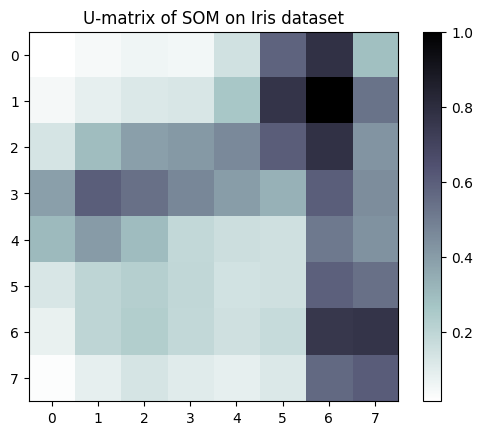

In [32]:
heatmap = som.distance_map() # generate U-Matrix
# Set the colormap to 'bone_r'. This changes the default colormap as well as the colormap of the current image if there is one.
plt.imshow(heatmap, cmap='bone_r')
plt.colorbar()
plt.title('U-matrix of SOM on Iris dataset')

Plot where the samples fall on the SOM output layer.

The samples of the three classes fall at different positions on the output layer of SOM. The dividing lines (deep dark lines) on the heatmap roughly divide the blue samples from the orange and green samples.

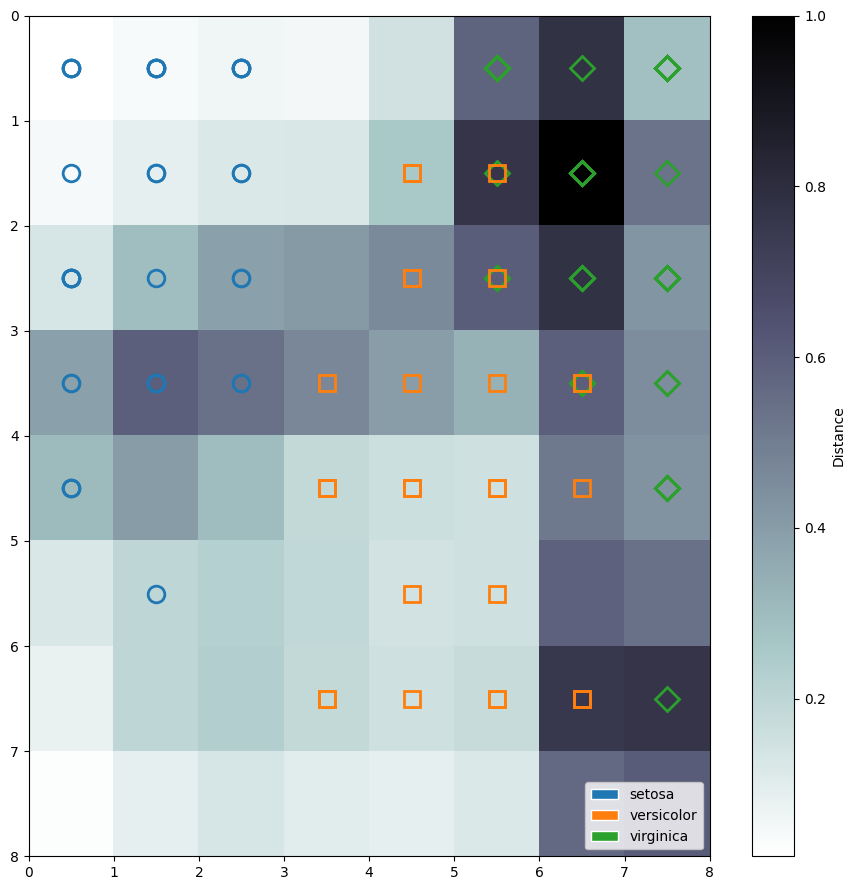

In [42]:
plt.figure(figsize=(9, 9))

# Plot U-matrix as background
heatmap = som.distance_map()
plt.pcolor(heatmap, cmap='bone_r')

# Set different marks to different labels
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
category_color = {'setosa': 'C0',
                  'versicolor': 'C1',
                  'virginica': 'C2'}
for cnt, xx in enumerate(X_train):
    # getting the winner
    w = som.winner(xx)
    # add marks to the heatmap
    plt.plot(w[0]+.5, w[1]+.5, markers[y_train[cnt]], markerfacecolor='None',
             markeredgecolor=colors[y_train[cnt]], markersize=12, markeredgewidth=2)
plt.axis([0, size, 0, size])
ax = plt.gca()
ax.invert_yaxis()  # Invert y-axis

# Add legend in the upper right corner
legend_elements = [Patch(facecolor=clr, edgecolor='w', label=l) for l, clr in category_color.items()]
plt.legend(handles=legend_elements, loc='lower right')

# Create a color bar next to the plot
cbar = plt.colorbar()
cbar.set_label('Distance')

plt.tight_layout()
plt.show()

# Clustering with SOM
In this section, we use MiniSom to cluster the Iris dataset.

First, let's load the data and train our SOM:

In [56]:
import numpy as np
from minisom import MiniSom
from sklearn.metrics.cluster import normalized_mutual_info_score

# Define the ranges for each parameter
num_iteration_list = [100, 500, 1000]
sigma_list = [0.5, 0.7, 1.0]
learning_rate_list = [0.3, 0.5, 0.7]
neighborhood_function_list = ['gaussian', 'bubble', 'triangle']

# Store the results
results = []

# Loop through different values of parameters
for num_iter in num_iteration_list:
    for sigma_val in sigma_list:
        for lr in learning_rate_list:
            for nf in neighborhood_function_list:
                som = MiniSom(som_shape[0], som_shape[1], X.shape[1], sigma=sigma_val, learning_rate=lr,
                              neighborhood_function=nf, random_seed=10)

                som.train_batch(X, num_iter)

                winner_coordinates = np.array([som.winner(x) for x in X]).T
                cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

                # Compute the performance metric
                nmi_score = normalized_mutual_info_score(y, cluster_index)

                # Store the results
                results.append([num_iter, sigma_val, lr, nf, nmi_score])

# Sort results by NMI score in descending order
results.sort(key=lambda x: x[-1], reverse=True)

# Keep only the top 10% of results
top_20_percent = int(1 * len(results))
best_results = results[:top_20_percent]

# Display the best results as a markdown table
headers = ["num_iteration", "sigma", "learning_rate", "neighborhood_function", "NMI Score"]
print("| {:<15} | {:<10} | {:<13} | {:<22} | {:<10} |".format(headers[0], headers[1], headers[2], headers[3], headers[4]))
print("|----------------|------------|---------------|--------------------------|------------|")
for row in best_results:
    print("| {:<15} | {:<10} | {:<13} | {:<22} | {:<10.4f} |".format(row[0], row[1], row[2], row[3], row[4]))

# Select the best parameters
best_params = best_results[0]
best_num_iter, best_sigma_val, best_lr, best_nf, best_nmi_score = best_params

# Train the best SOM
best_som = MiniSom(som_shape[0], som_shape[1], X.shape[1], sigma=best_sigma_val, learning_rate=best_lr,
                   neighborhood_function=best_nf, random_seed=10)
best_som.train_batch(X, best_num_iter)


/usr/local/lib/python3.10/dist-packages/minisom.py:205: UserWarning: sigma should be an integer >=1 when triangle or bubbleare used as neighborhood function
  warn('sigma should be an integer >=1 when triangle or bubble' +
/usr/local/lib/python3.10/dist-packages/minisom.py:205: UserWarning: sigma should be an integer >=1 when triangle or bubbleare used as neighborhood function
  warn('sigma should be an integer >=1 when triangle or bubble' +
/usr/local/lib/python3.10/dist-packages/minisom.py:205: UserWarning: sigma should be an integer >=1 when triangle or bubbleare used as neighborhood function
  warn('sigma should be an integer >=1 when triangle or bubble' +
/usr/local/lib/python3.10/dist-packages/minisom.py:205: UserWarning: sigma should be an integer >=1 when triangle or bubbleare used as neighborhood function
  warn('sigma should be an integer >=1 when triangle or bubble' +
/usr/local/lib/python3.10/dist-packages/minisom.py:205: UserWarning: sigma should be an integer >=1 when tri

| num_iteration   | sigma      | learning_rate | neighborhood_function  | NMI Score  |
|----------------|------------|---------------|--------------------------|------------|
| 1000            | 0.7        | 0.3           | gaussian               | 0.7900     |
| 1000            | 1.0        | 0.3           | gaussian               | 0.7782     |
| 1000            | 0.5        | 0.5           | gaussian               | 0.7777     |
| 1000            | 0.7        | 0.5           | gaussian               | 0.7777     |
| 500             | 1.0        | 0.5           | gaussian               | 0.7701     |
| 500             | 1.0        | 0.7           | gaussian               | 0.7701     |
| 1000            | 1.0        | 0.7           | gaussian               | 0.7561     |
| 1000            | 0.5        | 0.7           | gaussian               | 0.7496     |
| 1000            | 0.7        | 0.7           | gaussian               | 0.7496     |
| 500             | 1.0        | 0.3      

Now, we consider all the sample mapped into a specific neuron as a cluster.

To identify each cluster more easily we will translate the bidimensional indexes of the neurons on the SOM into a monodimentional indexes:

In [57]:
som = best_som

# Each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in X]).T
# With np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

We can plot each cluster with a different color:

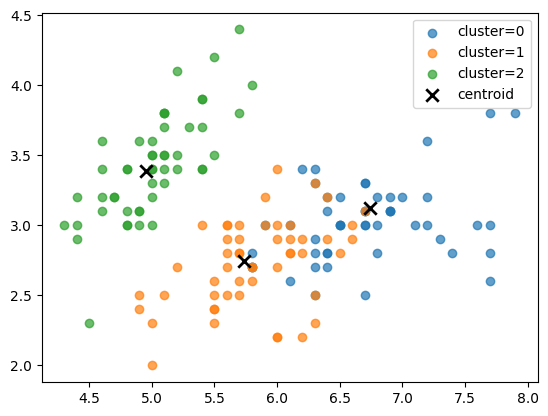

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(X[cluster_index == c, 0],
                X[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x',
                s=80, linewidths=2, color='k', label='centroid')
plt.legend()

You can measure your clustering results with **Normalized Mutual Information** (NMI), the higher the better.

In [50]:
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(y, cluster_index)

0.7776631579462302

# Classification with SOM
Although SOM is an unsupervised learning method, we can still utilize it to help solving classification problems.

This example shows how to use ``MiniSom`` to solve a classification problem.
The classification mechanism will be implemented with ``MiniSom`` and the evaluation will make use of ``sklearn``.

Since we have loaded Iris dataset previously, we can continue using this dataset.

Here's naive classification function that classifies a sample in data using the label assigned to the associated winning neuron.
A label is associated to a neuron if the majority of samples mapped in that neuron have label.
The function will assign the most common label in the dataset in case that a sample is mapped to a neuron for which no class is assigned.



In [61]:
def classify(som, data):
    """Classifies each sample in data in one of the classes definited
    using the method labels_map.
    Returns a list of the same length of data where the i-th element
    is the class assigned to data[i].
    """
    winmap = som.labels_map(X_train, y_train)
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

Now, we can use the splited training ``X_train`` and test set ``X_test`` in previous section, and train the som again.
We print the classification report that contains all the metrics to evaluate the results of the classification.

In [62]:
from sklearn.metrics import classification_report

som = MiniSom(7, 7, 4, sigma=3, learning_rate=0.5,
              neighborhood_function='triangle', random_seed=10)
som.pca_weights_init(X_train)
som.train_random(X_train, 500, verbose=False)

print(classification_report(y_test, classify(som, X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.77      0.87        13
           2       0.67      1.00      0.80         6

    accuracy                           0.90        30
   macro avg       0.89      0.92      0.89        30
weighted avg       0.93      0.90      0.90        30

